Top 5 Crimes in Northeast Region (2020):
THEFT PLAIN - PETTY ($950 & UNDER)                         299
BURGLARY                                                   290
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    288
BATTERY - SIMPLE ASSAULT                                   273
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            272
Name: Crm Cd Desc, dtype: int64




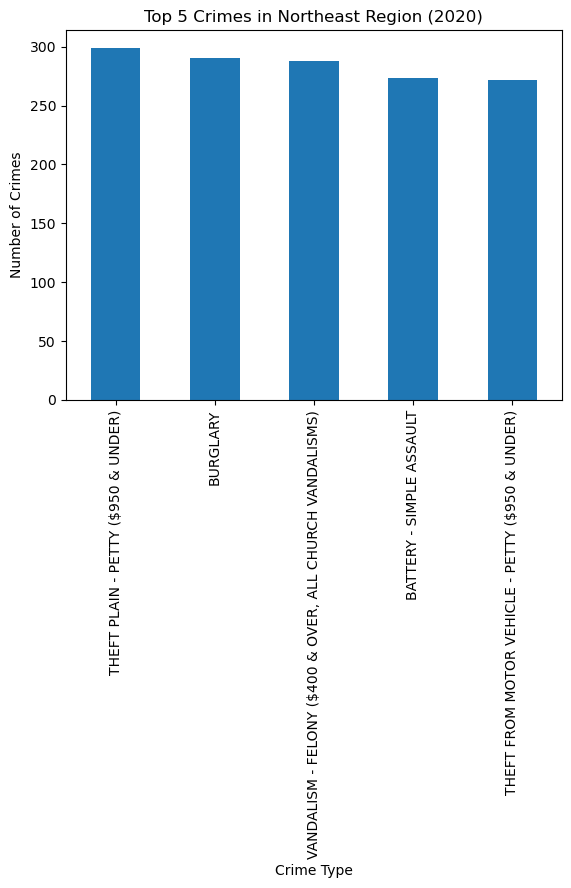

Top 5 Crimes in Northeast Region (2021):
THEFT PLAIN - PETTY ($950 & UNDER)                         301
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    292
BURGLARY                                                   282
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        279
BATTERY - SIMPLE ASSAULT                                   274
Name: Crm Cd Desc, dtype: int64




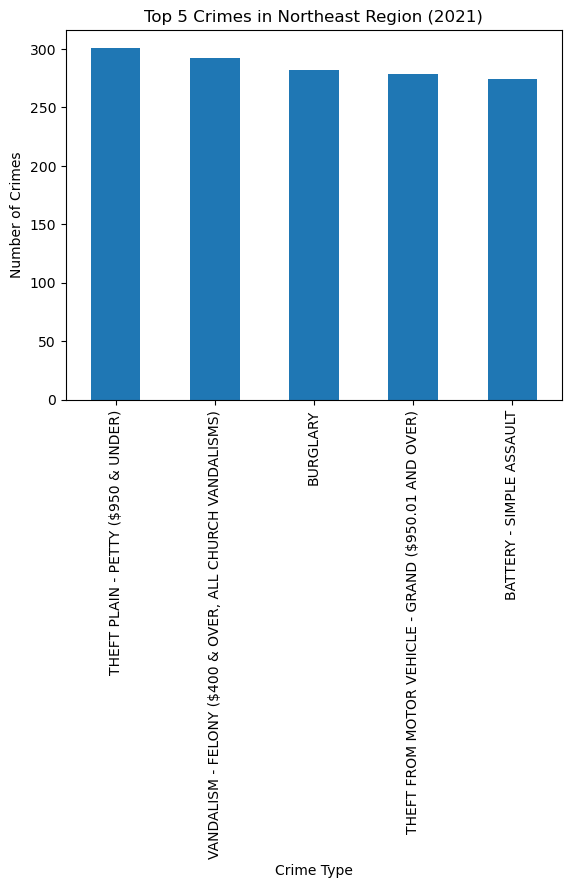

Top 5 Crimes in Northeast Region (2022):
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    302
BATTERY - SIMPLE ASSAULT                                   298
THEFT PLAIN - PETTY ($950 & UNDER)                         295
BURGLARY                                                   290
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        286
Name: Crm Cd Desc, dtype: int64




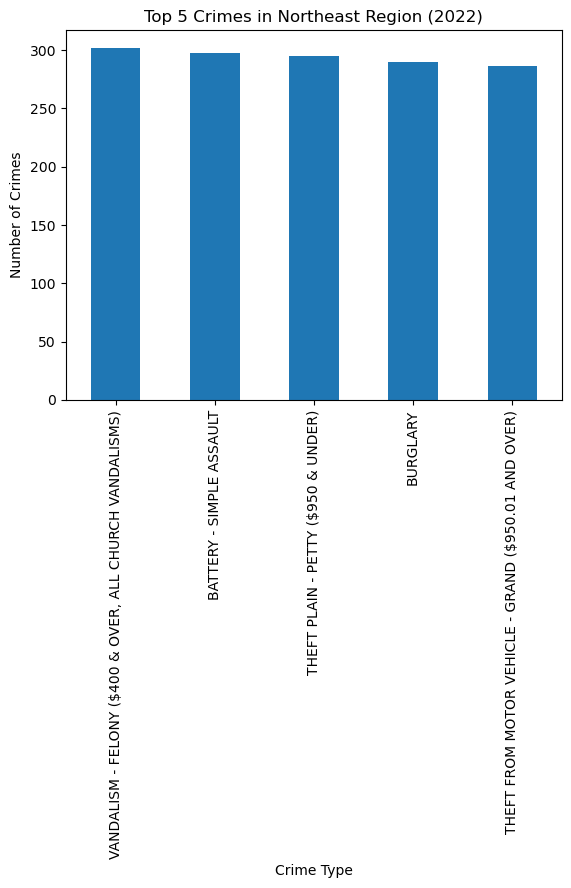

Top 5 Crimes in Northeast Region (2023):
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        107
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    107
BURGLARY                                                    96
BATTERY - SIMPLE ASSAULT                                    94
THEFT OF IDENTITY                                           87
Name: Crm Cd Desc, dtype: int64




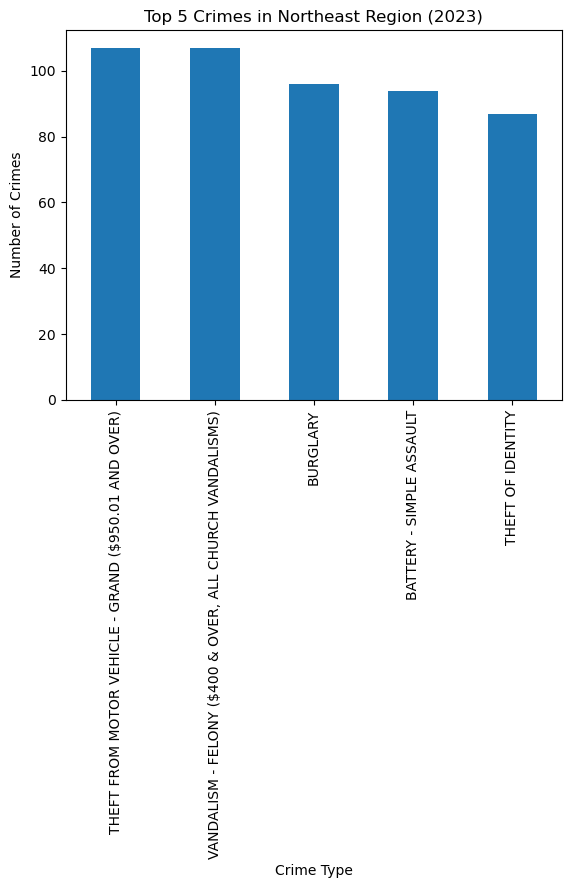

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from the CSV file
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")


# Convert date columns to datetime objects
data["DATE OCC"] = pd.to_datetime(data["DATE OCC"], errors='coerce')
data["Date Rptd"] = pd.to_datetime(data["Date Rptd"], errors='coerce')

# Remove unnecessary columns
columns_to_keep = ['AREA NAME', 'DATE OCC', 'Crm Cd Desc']
data = data[columns_to_keep]

# Drop rows with missing values
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()

# Handle outliers (example: remove rows with crime count > 99th percentile)
crime_counts = data["Crm Cd Desc"].value_counts()
threshold = crime_counts.quantile(0.99)
crime_counts_filtered = crime_counts[crime_counts <= threshold]
data = data[data["Crm Cd Desc"].isin(crime_counts_filtered.index)]

# Filter data by region (Northeast Los Angeles)
northeast_data = data[data["AREA NAME"] == "Northeast"]

# Create a DataFrame for each year
years = [2020, 2021, 2022, 2023]
data_by_year = {year: northeast_data[northeast_data["DATE OCC"].dt.year == year] for year in years}

# 1. Top 5 crimes in each region (Bar chart)
for year, df in data_by_year.items():
    top_5_crimes = df["Crm Cd Desc"].value_counts().head(5)

    # Print the table for the bar chart
    print(f"Top 5 Crimes in Northeast Region ({year}):")
    print(top_5_crimes)
    print("\n")

    # Plot the bar chart
    plt.figure()
    top_5_crimes.plot(kind='bar')
    plt.title(f"Top 5 Crimes in Northeast Region ({year})")
    plt.xlabel("Crime Type")
    plt.ylabel("Number of Crimes")
    plt.show()




Top 5 Crimes vs Years:
                                                    2020  2021  2022  2023
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   288   292   302   107
THEFT PLAIN - PETTY ($950 & UNDER)                   299   301   295    84
BURGLARY                                             290   282   290    96
BATTERY - SIMPLE ASSAULT                             273   274   298    94
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...   216   279   286   107




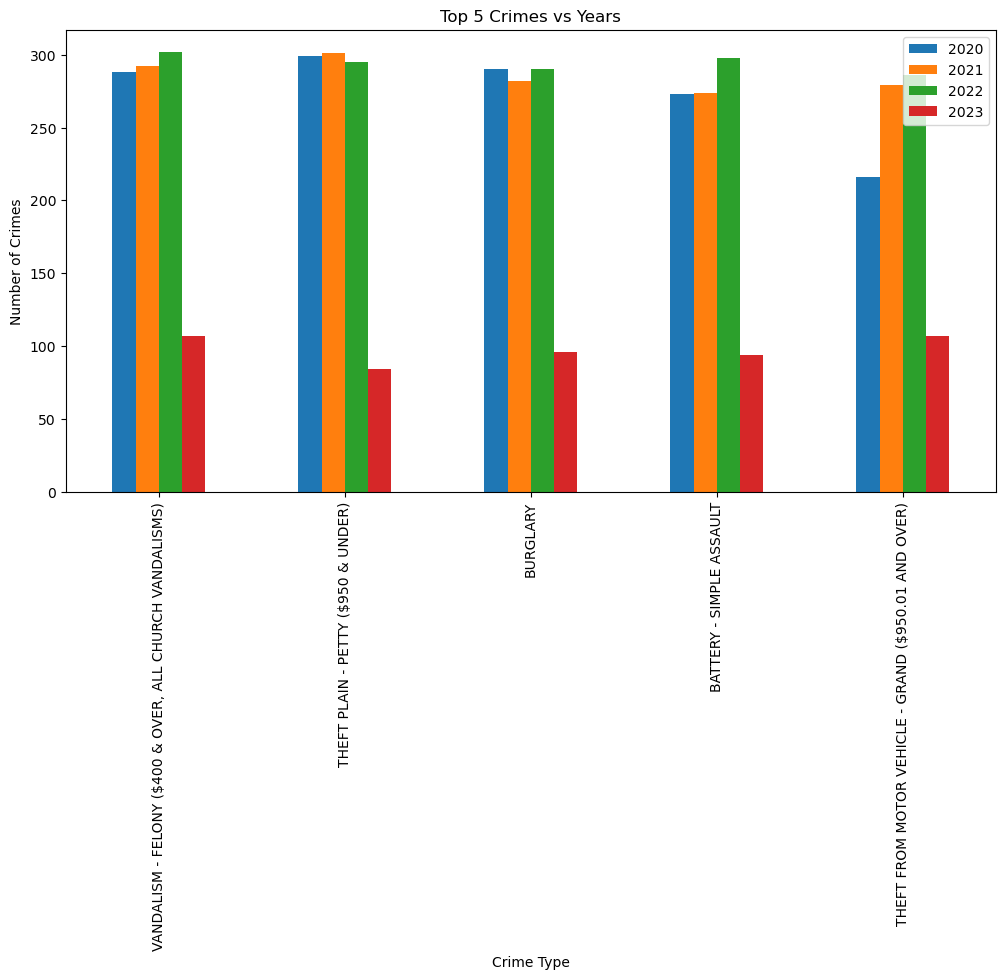

In [2]:
# 2. Top 5 crimes vs years (Bar Chart)
top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

Top 5 Crimes vs Seasons:
                                                    Winter  Spring  Summer  \
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...     268     284     232   
THEFT PLAIN - PETTY ($950 & UNDER)                     282     261     209   
BURGLARY                                               264     269     222   
BATTERY - SIMPLE ASSAULT                               235     264     224   
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...     252     241     189   

                                                    Autumn  
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...     205  
THEFT PLAIN - PETTY ($950 & UNDER)                     227  
BURGLARY                                               203  
BATTERY - SIMPLE ASSAULT                               216  
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...     206  




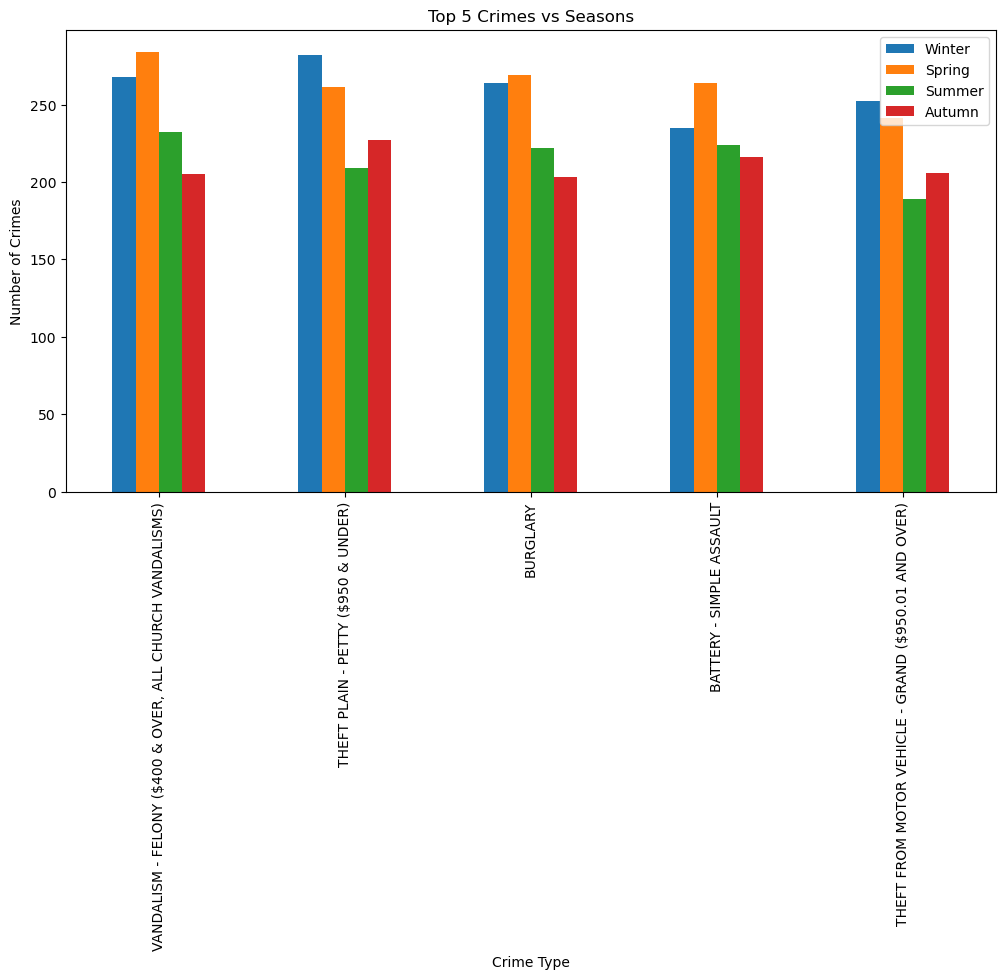

Winter crime counts for 2020:
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    69
THEFT PLAIN - PETTY ($950 & UNDER)                         85
BURGLARY                                                   73
BATTERY - SIMPLE ASSAULT                                   63
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        58
Name: Crm Cd Desc, dtype: int64


Winter crime counts for 2021:
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    75
THEFT PLAIN - PETTY ($950 & UNDER)                         72
BURGLARY                                                   73
BATTERY - SIMPLE ASSAULT                                   63
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        71
Name: Crm Cd Desc, dtype: int64


Winter crime counts for 2022:
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    76
THEFT PLAIN - PETTY ($950 & UNDER)                         79
BURGLARY                                                   75
BATTERY - SIMPLE ASSAULT            

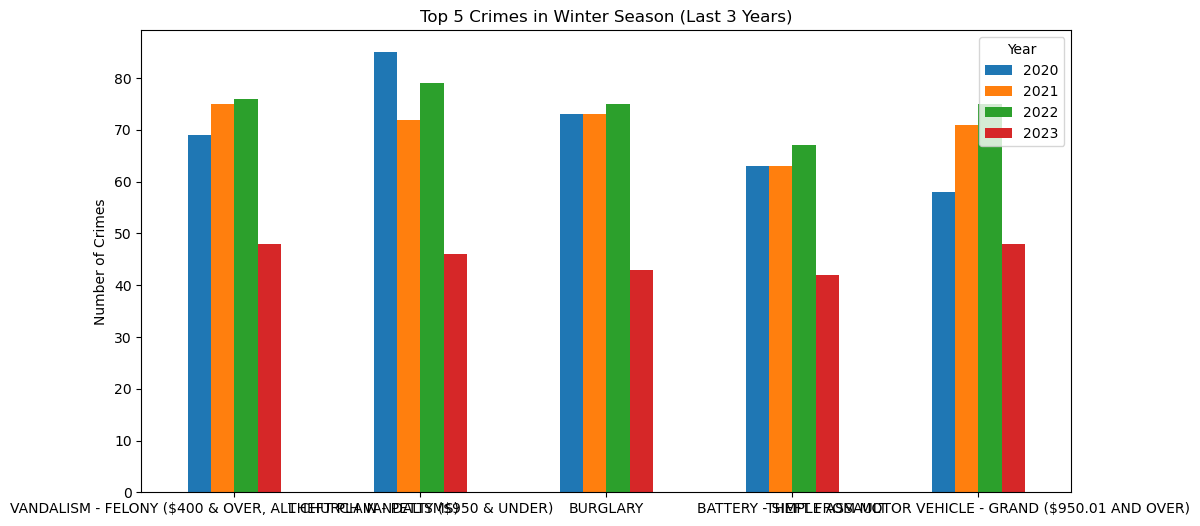

In [3]:
# 2. Top 5 crimes vs seasons (Bar Chart)
seasons = {"Winter": [12, 1, 2], "Spring": [3, 4, 5], "Summer": [6, 7, 8], "Autumn": [9, 10, 11]}
crimes_by_season = {season: northeast_data[northeast_data["DATE OCC"].dt.month.isin(months)] for season, months in seasons.items()}
top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by season
crime_counts_by_season = {}
for season, crimes in crimes_by_season.items():
    crime_counts_by_season[season] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]


# Print the table for the bar chart
print("Top 5 Crimes vs Seasons:")
print(pd.DataFrame(crime_counts_by_season))
print("\n")
# Plot the bar chart
seasonal_crime_counts_df = pd.DataFrame(crime_counts_by_season)
seasonal_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Seasons")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

# Calculate the number of top 5 crimes for Winter season in each year
winter_crime_counts_by_year = {}
for year, df in data_by_year.items():
    winter_data = df[df["DATE OCC"].dt.month.isin(seasons["Winter"])]
    winter_crime_counts_by_year[year] = winter_data["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Display the Winter crime counts for each year
for year, winter_crime_counts in winter_crime_counts_by_year.items():
    print(f"Winter crime counts for {year}:")
    print(winter_crime_counts)
    print("\n")

# Print the table for the bar graph
print("Top 5 Crimes in Winter Season (Last 3 Years):")
print(pd.DataFrame(winter_crime_counts_by_year))
print("\n")

# Create a DataFrame for Winter crime counts for each year
winter_crime_counts_df = pd.DataFrame(winter_crime_counts_by_year)

# Plot the bar graph
ax = winter_crime_counts_df.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crimes in Winter Season (Last 3 Years)")
plt.xticks(range(len(top_5_crimes_overall)), top_5_crimes_overall)
plt.legend(title="Year")
plt.show()



Top 3 Crimes vs Month (2020 - 2023):
Crm Cd Desc  BURGLARY  THEFT PLAIN - PETTY ($950 & UNDER)  \
DATE OCC                                                    
2020-01            25                                  29   
2020-02            22                                  29   
2020-03            22                                  26   
2020-04            27                                  22   
2020-05            24                                  23   
2020-06            24                                  21   
2020-07            28                                  22   
2020-08            26                                  22   
2020-09            25                                  28   
2020-10            21                                  28   
2020-11            20                                  22   
2020-12            26                                  27   
2021-01            24                                  25   
2021-02            24                           

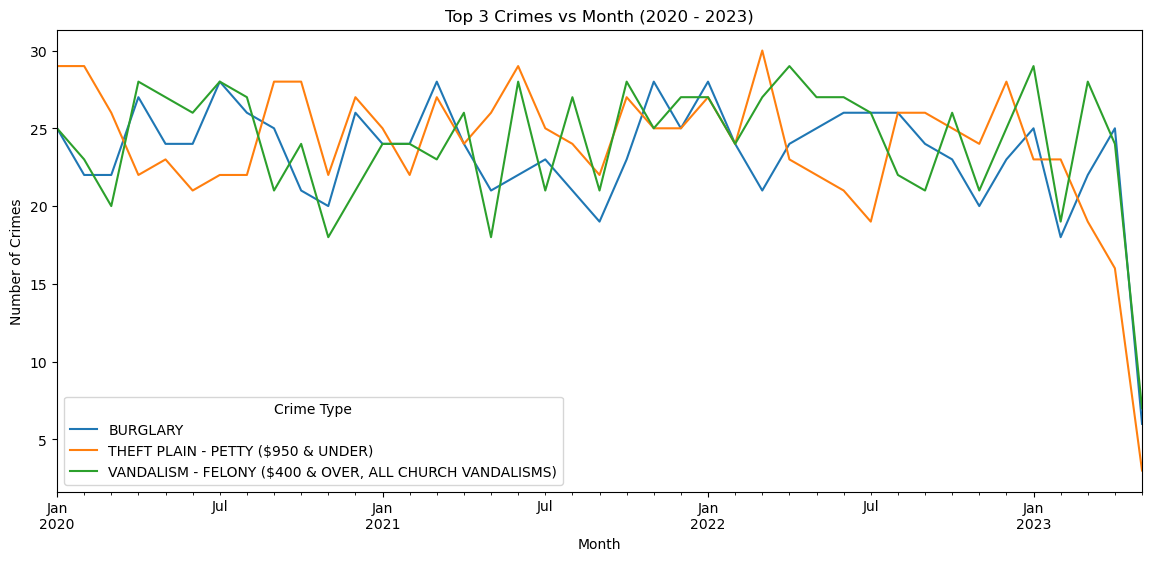

Top 3 Crimes During Socioeconomic Events:
                                                    Pre-COVID  During COVID  \
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...         48           532   
THEFT PLAIN - PETTY ($950 & UNDER)                         58           542   
BURGLARY                                                   47           525   

                                                    Post-COVID  \
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...         409   
THEFT PLAIN - PETTY ($950 & UNDER)                         379   
BURGLARY                                                   386   

                                                    During Inflation  \
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...               302   
THEFT PLAIN - PETTY ($950 & UNDER)                               295   
BURGLARY                                                         290   

                                                    Post-Inflation  
VANDALISM - FELONY

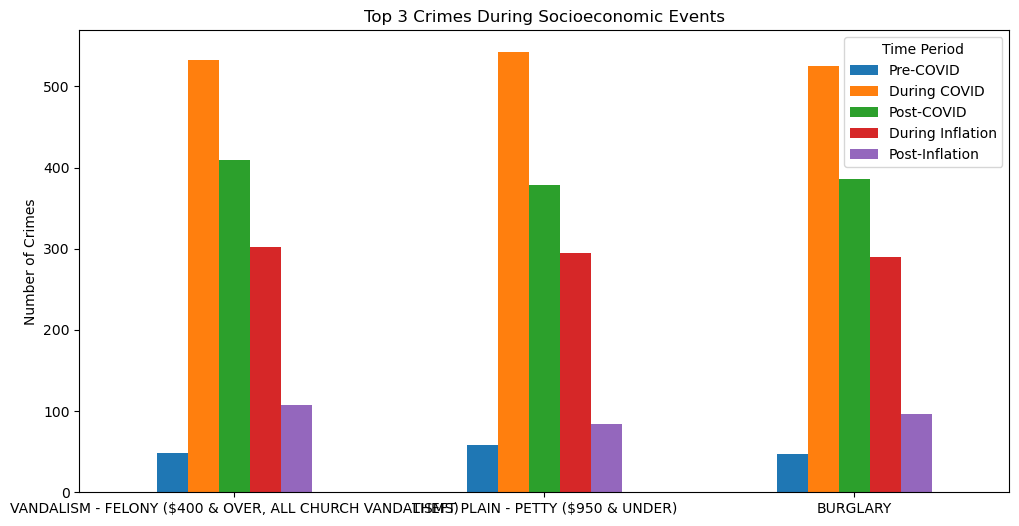

In [4]:
# 3. Top 3 crimes vs month (Line chart)
top_3_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(3).index.tolist()
top_3_crimes_data = northeast_data[northeast_data["Crm Cd Desc"].isin(top_3_crimes_overall)]
crimes_by_month = top_3_crimes_data.groupby([top_3_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Print the table for the line chart
print("Top 3 Crimes vs Month (2020 - 2023):")
print(crimes_by_month)
print("\n")

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 3 Crimes vs Month (2020 - 2023)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.show()


top_3_crimes = top_5_crimes_overall[:3]

pre_covid_period = (data["DATE OCC"] < "2020-03-01")
during_covid_period = (data["DATE OCC"] >= "2020-03-01") & (data["DATE OCC"] <= "2021-12-31")
post_covid_period = (data["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (data["DATE OCC"] >= "2022-01-01") & (data["DATE OCC"] <= "2022-12-31")
post_inflation_period = (data["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = data[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
during_covid_crime_counts = data[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_covid_crime_counts = data[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]

during_inflation_crime_counts = data[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_inflation_crime_counts = data[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 3 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 3 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_3_crimes)), top_3_crimes)
plt.legend(title="Time Period")
plt.show()